## Simple Linear Regression

In [30]:
import seaborn as sns

In [31]:
diamonds = sns.load_dataset('diamonds')

In [32]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [34]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [41]:
X = diamonds[["carat", "depth", "table", "x", "y", "z"]]
y = diamonds["price"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [46]:
X_train.describe()

,carat,depth,table,x,y,z
count,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000,37758.000000
mean,0.798455,61.744467,57.456197,5.731666,5.735774,3.538708
std,0.475018,1.434500,2.245275,1.123743,1.156036,0.696606
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


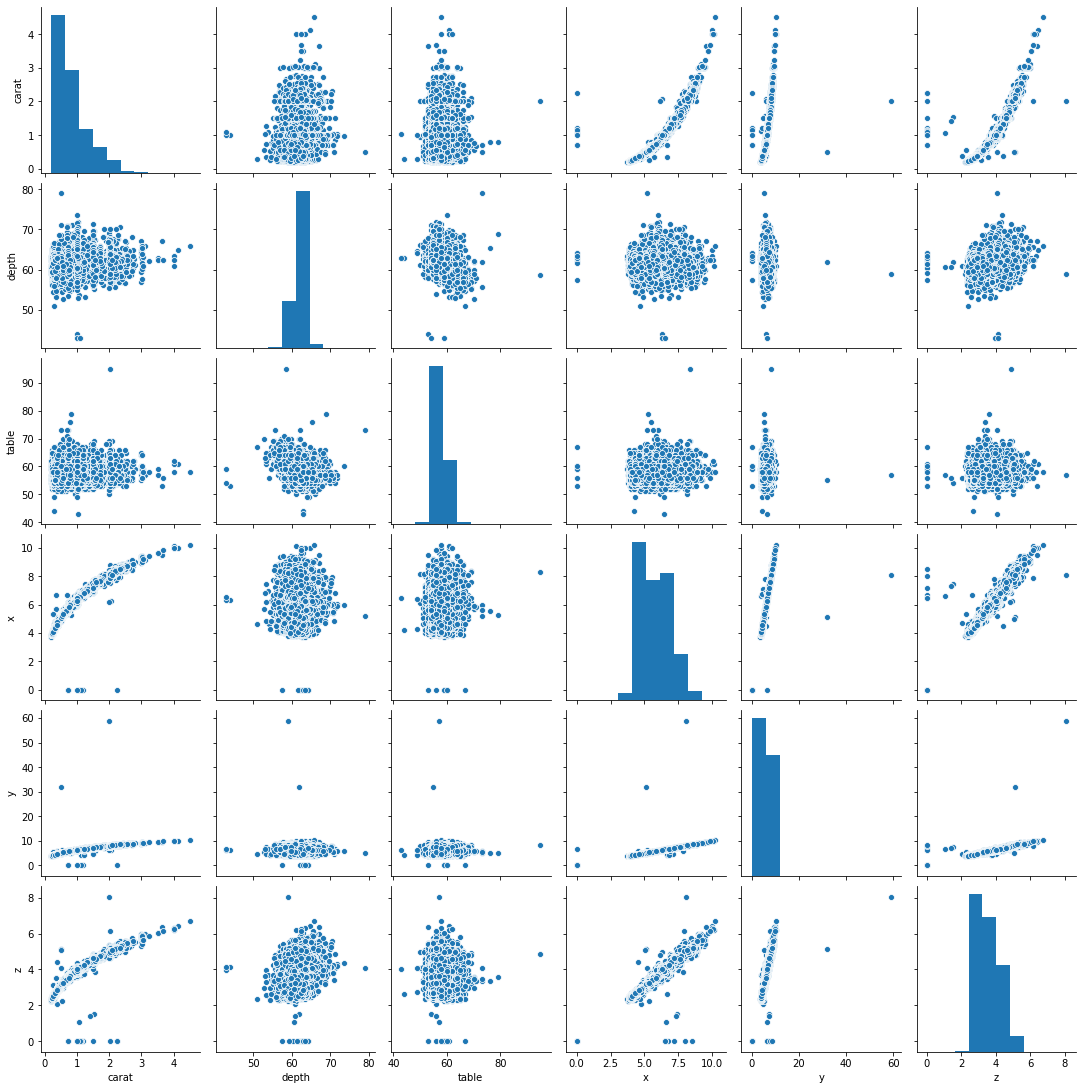

In [45]:
sns.pairplot(X_train)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
st_scaler = StandardScaler()

In [49]:
st_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
X_train_scaled = st_scaler.transform(X_train)

In [54]:
import pandas as pd

In [56]:
pd.DataFrame(X_train_scaled, columns=X_train.columns).describe()

,carat,depth,table,x,y,z
count,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04,3.775800e+04
mean,-1.985334e-16,-3.983748e-15,-1.722066e-15,-1.388793e-16,-4.705525e-16,6.938321e-16
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.259873e+00,-1.306707e+01,-6.438582e+00,-5.100581e+00,-4.961654e+00,-5.079992e+00
25%,-8.388315e-01,-5.189803e-01,-6.485693e-01,-9.091755e-01,-8.786816e-01,-9.025412e-01
50%,-2.072687e-01,3.871268e-02,-2.031837e-01,-2.817953e-02,-2.229535e-02,-2.685564e-02
75%,5.085024e-01,5.266940e-01,6.875874e-01,7.193322e-01,6.956850e-01,7.196304e-01
max,7.792527e+00,1.202911e+01,1.672147e+01,4.003044e+00,4.598900e+01,6.490542e+00


In [59]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

In [63]:
print(lin.intercept_)

3936.1183325387988


In [65]:
pd.DataFrame(lin.coef_, X.columns, columns=["Coefficient"])

,Coefficient
carat,4994.814989
depth,-289.165680
table,-233.587868
x,-1388.377739
y,39.123810
z,50.385493


In [66]:
X_test

,carat,depth,table,x,y,z
446,0.61,60.1,57.0,5.52,5.54,3.32
41277,0.41,63.8,57.0,4.69,4.72,3.00
24945,2.10,62.5,57.0,8.21,8.18,5.12
24818,2.08,63.4,59.0,8.06,8.00,5.09
8002,1.01,60.5,58.0,6.52,6.48,3.93
...,...,...,...,...,...,...
48602,0.72,61.6,56.0,5.76,5.73,3.54
1457,0.76,62.1,56.0,5.85,5.88,3.64
17167,1.01,61.0,56.0,6.46,6.49,3.95
15896,1.22,61.9,56.0,6.89,6.84,4.25


In [67]:
X_test_scaled = st_scaler.transform(X_test)

In [69]:
pd.DataFrame(X_test_scaled, columns=X_test.columns).describe()

,carat,depth,table,x,y,z
count,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000,16182.000000
mean,-0.003617,0.011473,0.001465,-0.001510,-0.003598,0.000125
std,0.992954,0.995625,0.983941,0.994151,0.959370,1.042919
min,-1.259873,-7.629565,-3.320883,-5.100581,-4.961654,-5.079992
25%,-0.838832,-0.518980,-0.648569,-0.900277,-0.878682,-0.902541
50%,-0.207269,0.038713,-0.203184,-0.037078,-0.022295,-0.012500
75%,0.508502,0.526694,0.687587,0.719332,0.687035,0.705275
max,8.866183,12.029111,6.922985,4.456891,4.155831,40.570502


In [70]:
y_predictions = lin.predict(X_test_scaled)

In [73]:
import matplotlib.pyplot as plt

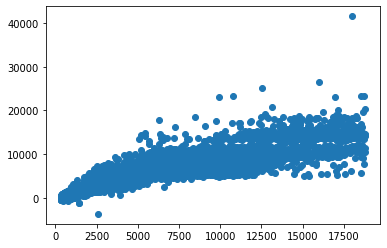

In [75]:
plt.scatter(y_test, y_predictions)
plt.show()

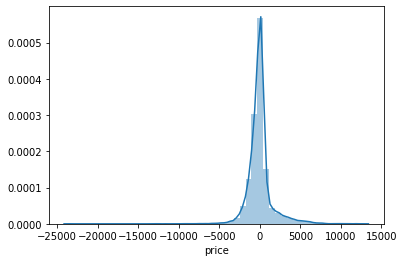

In [76]:
sns.distplot((y_test-y_predictions), bins=50)

In [77]:
from sklearn import metrics

In [78]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_predictions))

RMSE:  1493.961659427902
MAE:  892.5250603214403


## (Somewhat) Advanced Linear Regression

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [81]:
diamonds = sns.load_dataset('diamonds')

In [82]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [86]:
cut = pd.get_dummies(diamonds["cut"], drop_first=True)
color = pd.get_dummies(diamonds["color"], drop_first=True)
clarity = pd.get_dummies(diamonds["clarity"], drop_first=True)

In [88]:
diamonds.drop(["cut", "color", "clarity"], axis=1, inplace=True)

In [92]:
data = pd.concat([diamonds, cut, color, clarity], axis=1)

In [103]:
data

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [93]:
X = data.drop("price", axis=1)
y = data["price"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [97]:
st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

In [98]:
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
X_test_scaled = st_scaler.transform(X_test)
y_predict = lin.predict(X_test_scaled)

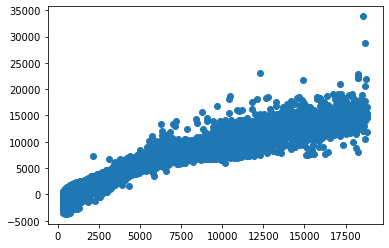

In [100]:
plt.scatter(y_test, y_predict)

In [102]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_predict))

RMSE:  1113.6404172324405
MAE:  740.5597995462904


### PCA after feature creation

In [104]:
data

,carat,depth,table,price,x,y,z,Good,Ideal,Premium,...,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [105]:
X = data.drop("price", axis=1)
y = data["price"]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [107]:
st_scaler = StandardScaler()

In [108]:
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

In [111]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA(n_components=23)

In [140]:
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [141]:
X_train_transformed = pca.transform(X_train_scaled)

In [142]:
lin = LinearRegression()

In [143]:
lin.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
X_test_scaled = st_scaler.transform(X_test)
X_test_transformed = pca.transform(X_test_scaled)
y_predict = lin.predict(X_test_transformed)

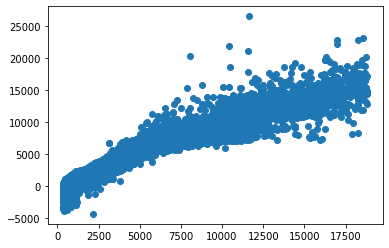

In [145]:
plt.scatter(y_test, y_predict)

In [146]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print("MAE: ", metrics.mean_absolute_error(y_test, y_predict))

RMSE:  1112.739839562715
MAE:  743.2371695427619
